In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('wdbc.data', header=None)

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [5]:
label_col = 1

In [6]:
X = df.drop(label_col, axis=1)
y = df.iloc[:, label_col]

# Separando conjunto de treino, teste e validação em duas etapas

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

## Criando modelos

In [9]:
models = {}

models['dt'] = DecisionTreeClassifier(random_state=42)
models['rf'] = RandomForestClassifier(random_state=42)
models['gb'] = GradientBoostingClassifier(random_state=42)

## Hiperparâmetros

In [10]:
params = {}

params['dt'] = {'max_depth': [3, 5, 7]}
params['rf'] = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}
params['gb'] = {'learning_rate' : [0.1, 0.05, 0.01], 'n_estimators': [50, 100, 200]}

## Kfold Stratificado de 5-fold

### Usando 5-fold teremos 20% do dado usado para validação

In [11]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [12]:
results = {}

for name, model in models.items():
    gscv = GridSearchCV(model, params[name], cv=cv, n_jobs=-1, verbose=True, return_train_score=True)
    gscv.fit(X_train, y_train)
    results[name] = gscv

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.9s finished


# Verificando resultados

## DecisionTree

In [13]:
cols = ['param_max_depth', 'mean_train_score','mean_test_score']

pd.DataFrame(results['dt'].cv_results_)[cols].sort_values(by="mean_test_score", ascending=False)

,param_max_depth,mean_train_score,mean_test_score
1,5,0.990659,0.929670
0,3,0.976374,0.927473
2,7,0.997802,0.925275


## RandomForest

In [14]:
cols = ['param_max_depth','param_n_estimators','mean_train_score','mean_test_score']

pd.DataFrame(results['rf'].cv_results_)[cols].sort_values(by="mean_test_score", ascending=False)

,param_max_depth,param_n_estimators,mean_train_score,mean_test_score
4,5,100,0.993407,0.960440
6,7,50,0.998901,0.960440
7,7,100,0.998352,0.960440
8,7,200,0.998901,0.960440
5,5,200,0.991758,0.958242
1,3,100,0.980769,0.956044
2,3,200,0.980769,0.956044
3,5,50,0.993407,0.953846
0,3,50,0.980220,0.951648


## GradientBoosting

In [15]:
cols = ['param_learning_rate','param_n_estimators','mean_train_score','mean_test_score']

pd.DataFrame(results['gb'].cv_results_)[cols].sort_values(by="mean_test_score", ascending=False)

,param_learning_rate,param_n_estimators,mean_train_score,mean_test_score
1,0.1,100,1.000000,0.964835
2,0.1,200,1.000000,0.964835
5,0.05,200,1.000000,0.964835
0,0.1,50,1.000000,0.958242
4,0.05,100,1.000000,0.951648
3,0.05,50,0.993407,0.947253
8,0.01,200,0.992308,0.945055
7,0.01,100,0.987363,0.936264
6,0.01,50,0.974176,0.925275


# Feature importance

In [16]:
def showFeatureImportance(gscv, model_name):
    
    feature_importances = {
        'feature': X.columns,
        'importance': gscv.best_estimator_.feature_importances_
    }
    
    feature_importances = pd.DataFrame(data=feature_importances).sort_values(
        by='importance', ascending=False)
    
    #exibindo as 5 features mais importantes
    display(feature_importances.head())
    
    #gerando gráfico
    plt.figure(figsize=(15, 10))
    plt.title('{} feature importances'.format(model_name))

    plt.barh(y=range(feature_importances.shape[0]),
             width=np.flip(feature_importances['importance'].values),
             height=0.5)

    plt.yticks(range(feature_importances.shape[0]), np.flip(feature_importances['feature']))
    plt.show()

## GradientBoosting

,feature,importance
23,24,0.527807
8,9,0.154425
28,29,0.080849
21,22,0.054831
22,23,0.031515


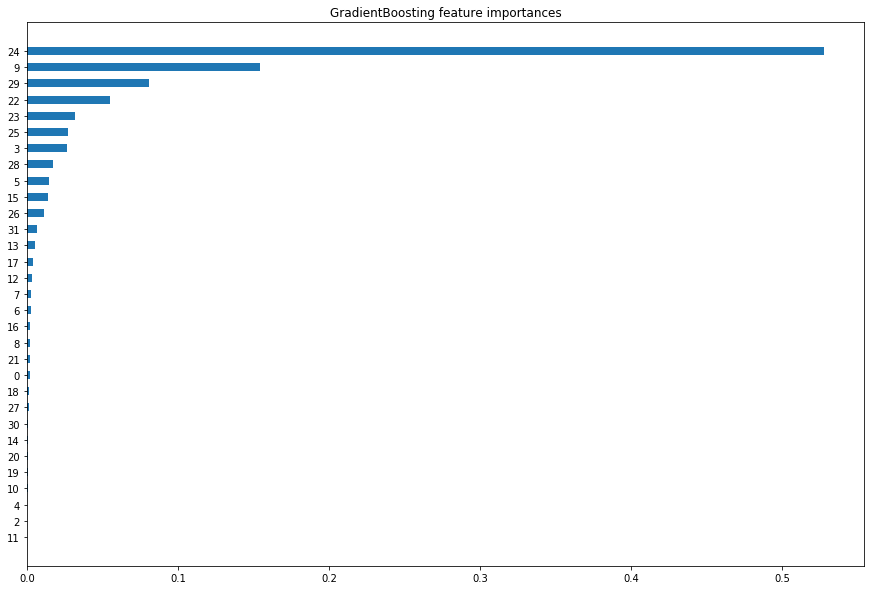

In [17]:
showFeatureImportance(results['gb'], 'GradientBoosting')

# DecisionTree

,feature,importance
23,24,0.761165
28,29,0.077848
2,3,0.030683
25,26,0.026109
4,5,0.023632


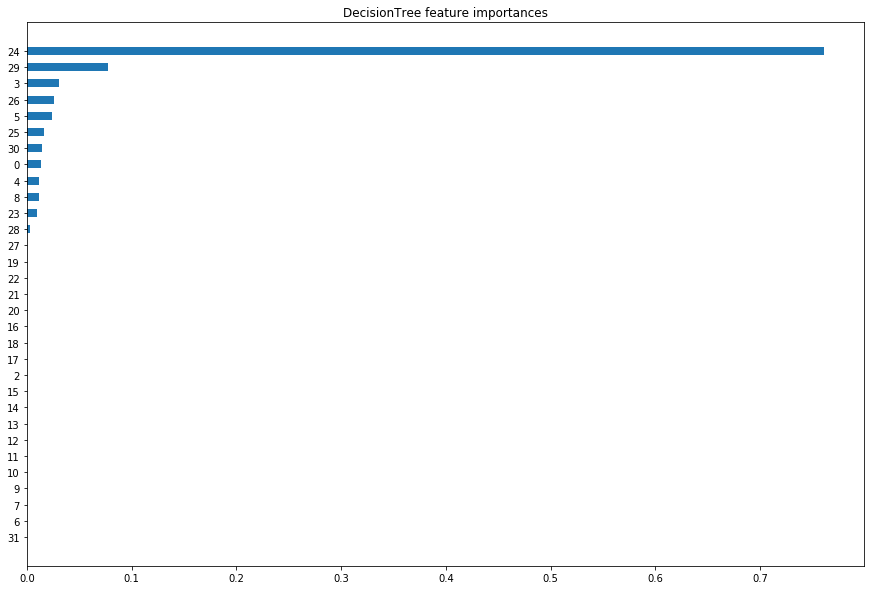

In [18]:
showFeatureImportance(results['dt'], 'DecisionTree')

# RandomForest

,feature,importance
23,24,0.139997
24,25,0.128724
28,29,0.107625
21,22,0.103401
8,9,0.089446


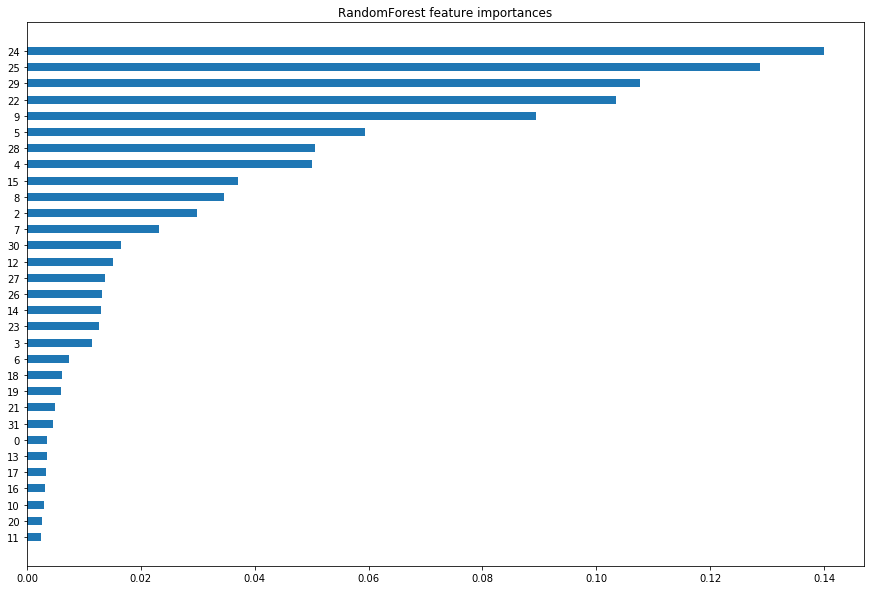

In [19]:
showFeatureImportance(results['rf'], 'RandomForest')

<hr style="height: 10px">

# Clusterização

In [20]:
from sklearn.cluster import KMeans

In [21]:
drivers = pd.read_csv('drivers.data', sep='\t')

In [22]:
drivers.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [23]:
drivers.isna().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [24]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


In [25]:
ids = drivers['Driver_ID']
drivers.drop('Driver_ID', axis=1, inplace=True)

In [26]:
inertias = []

for k in range(1,21):
    cluster = KMeans(n_clusters=k)
    cluster.fit(drivers)
    inertia = cluster.inertia_
    inertias.append(inertia)

### Regra do cotovelo

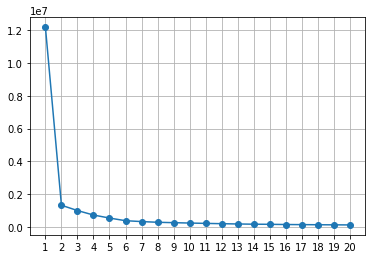

In [27]:
x = range(1, 21)
plt.grid()
plt.plot(x, inertias, marker='o')
plt.xticks(x);

In [28]:
cluster = KMeans(n_clusters=2, random_state=42)
result = cluster.fit(drivers)
centroids = cluster.cluster_centers_

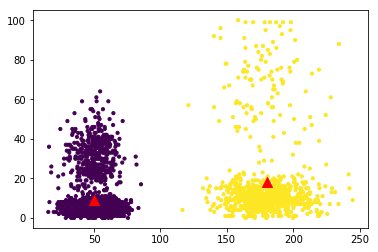

In [29]:
plt.scatter(drivers.iloc[:,0], drivers.iloc[:,1], c=cluster.labels_, s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='^', s=100)

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
clustering = DBSCAN(eps=30, min_samples=50).fit(drivers)
y = clustering.labels_

In [32]:
np.unique(y, return_counts=True)

(array([-1,  0,  1]), array([   2, 3200,  798]))

In [33]:
outliers = drivers[y == -1]

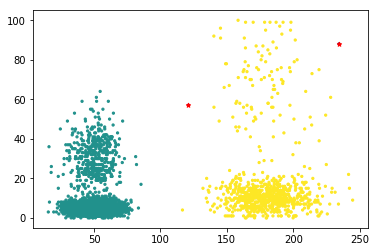

In [34]:
plt.scatter(drivers.iloc[:, 0], drivers.iloc[:, 1], s=5, c=y)
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], s=20, c='red', marker='*')
plt.show()